# 0. 导入相关包

In [67]:
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from ultralytics.utils.plotting import Annotator, colors

# 1、定义数据集路径

In [68]:
coco_path = r"E:\Projects\datasets\detect\COCO\coco"
dataset_type = "train2017"
ann_file = os.path.join(coco_path, f'annotations/instances_{dataset_type}.json')
print(f'Annotation file: {ann_file}')

Annotation file: E:\Projects\datasets\detect\COCO\coco\annotations/instances_train2017.json


# 2. 初始化COCO API

In [69]:
coco = COCO(ann_file)
print(COCO.__dict__.keys())
print(coco.__dict__.keys())

loading annotations into memory...
Done (t=17.44s)
creating index...
index created!
dict_keys(['__module__', '__init__', 'createIndex', 'info', 'getAnnIds', 'getCatIds', 'getImgIds', 'loadAnns', 'loadCats', 'loadImgs', 'showAnns', 'loadRes', 'download', 'loadNumpyAnnotations', 'annToRLE', 'annToMask', '__dict__', '__weakref__', '__doc__'])
dict_keys(['dataset', 'anns', 'cats', 'imgs', 'imgToAnns', 'catToImgs'])


# 3. 用例

## 3.1. 获取类

In [70]:
print(f'Categories: {coco.cats}')

classes = [category['name'] for category in list(coco.cats.values())]
print(f'Classes: {classes}')

cats = coco.loadCats(1)
print(f'"1" 对应的类别名称: {cats}')

super_categories = set([category['supercategory'] for category in list(coco.cats.values())])
print(f'Super Categories: {super_categories}')

Categories: {1: {'supercategory': 'person', 'id': 1, 'name': 'person'}, 2: {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, 3: {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, 4: {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, 5: {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, 6: {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, 7: {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, 8: {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, 9: {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, 10: {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, 11: {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, 13: {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, 14: {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, 15: {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, 16: {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, 17: {'supercategory': 'animal', 'id': 17, 'name': 'cat'}, 18

## 3.2. 获取类id

In [71]:
person_id = coco.getCatIds('person')  # 某一类id
print(f'Person id: {person_id}')

ids = coco.getCatIds(['bicycle', 'car'])  # 多类id
print(f'Category ids: {ids}')

all_id = coco.getCatIds()  # 所有类id
print(f'categories: {len(all_id)}')
print(f'All category ids: {all_id}')

Person id: [1]
Category ids: [2, 3]
categories: 80
All category ids: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


## 3.3. 获取图片

64115 [262145, 262146, 524291, 262148, 393223, 393224, 524297, 393227, 131084, 393230, 262161, 131089, 524311, 393241, 524314, 393243, 262171, 131101, 524317, 262175, 524320, 393251, 131108, 524325, 36, 131115, 524333, 262191, 49, 524338, 393267, 393268, 262197, 393271, 262200, 131127, 61, 262207, 393284, 74, 393290, 262221, 524366, 77, 131152, 524373, 262229, 86, 524375, 393306, 262235, 262238, 262239, 262242, 131172, 393317, 131174, 109, 110, 524401, 113, 262260, 393333, 131197, 127, 262273, 262274, 262275, 524420, 136, 131208, 131211, 524428, 262286, 524431, 131215, 524436, 149, 151, 131225, 262299, 393372, 393375, 524450, 165, 524453, 393384, 524459, 131245, 524467, 524470, 524476, 262334, 262335, 192, 262336, 393411, 524486, 201, 393418, 393419, 131276, 131277, 131279, 131280, 262353, 131282, 393428, 262359, 524507, 393438, 393442, 131299, 524522, 524525, 241, 131315, 524533, 262389, 524535, 524536, 262391, 262394, 393464, 262399, 257, 524547, 262404, 260, 393478, 131335, 393480, 

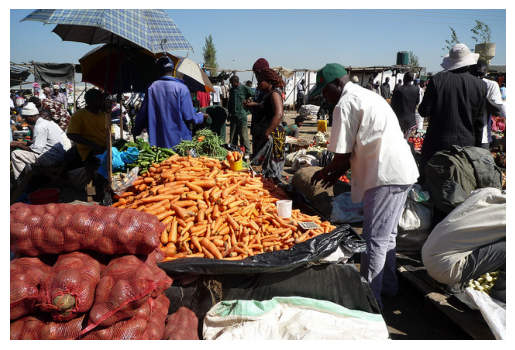

In [72]:
img_ids = coco.getImgIds(catIds=1)  # 某一类别的图片id
print(len(img_ids), img_ids)

# for img_id in img_ids:
#     img = coco.loadImgs(img_id)[0]
#     print(img)
img_info = coco.loadImgs(img_ids[0])[0]  # 根据图片id获取图片信息
print(f'Image info: {img_info}')

im_path = os.path.join(coco_path, 'images', dataset_type, img_info['file_name'])                     
im = Image.open(im_path)
plt.axis('off')
plt.imshow(im)
plt.show()

## 3.4. 获取标注

In [73]:
ann_ids = coco.getAnnIds(imgIds=img_info['id'])  # 根据图片id获取标注的Id
anns = coco.loadAnns(ann_ids)

print(f'Annotations: {anns}')
print(f'Annotations: {anns[0].keys()}')

segmentation = anns[0]['segmentation']
print(f'Segmentation: {segmentation}')

bbox = anns[0]['bbox']

print(f'Bounding box: {bbox}')

Annotations: [{'segmentation': [[214.27, 79.01, 220.54, 82.35, 235.99, 91.54, 247.69, 97.39, 255.2, 101.15, 265.64, 109.08, 261.89, 98.22, 256.04, 86.53, 248.94, 79.85, 244.76, 74.0, 237.66, 67.73, 232.23, 65.65, 228.89, 63.56, 231.4, 55.62, 229.31, 56.04, 226.38, 62.72, 220.12, 60.63, 215.94, 60.63, 214.27, 61.05, 218.87, 66.06, 216.36, 70.66, 212.6, 75.67, 212.6, 78.59]], 'area': 970.0430999999998, 'iscrowd': 0, 'image_id': 262145, 'bbox': [212.6, 55.62, 53.04, 53.46], 'category_id': 28, 'id': 284647}, {'segmentation': [[35.5, 1.76, 13.43, 16.15, 47.02, 19.03, 113.23, 24.79, 172.72, 47.82, 182.31, 51.66, 205.34, 56.45, 226.45, 56.45, 239.89, 57.41, 202.47, 3.68]], 'area': 6085.1964499999995, 'iscrowd': 0, 'image_id': 262145, 'bbox': [13.43, 1.76, 226.46, 55.65], 'category_id': 28, 'id': 285569}, {'segmentation': [[278.13, 265.47, 289.68, 284.8, 295.45, 285.96, 297.18, 281.63, 279.58, 260.56, 278.42, 262.58]], 'area': 164.15675000000002, 'iscrowd': 0, 'image_id': 262145, 'bbox': [278.

## 3.5. 显示标注

### 3.5.1. 显示目标检测标注

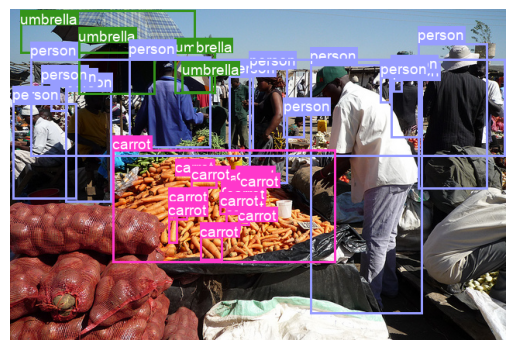

In [74]:
annotator_box = Annotator(im.copy(), line_width=3, pil=True)
for ann in anns:
    bbox = ann['bbox']
    x, y, w, h = bbox
    xyxy = [x, y, x+w, y+h]
    id = ann['category_id']
    label = coco.cats[id]['name']
    annotator_box.box_label(xyxy, label, color=colors(id, True))
annotated_frame = annotator_box.result()
plt.axis('off')
plt.imshow(annotated_frame)
plt.show()

### 3.5.2. 显示实例分割标注

In [66]:
import torch
from copy import deepcopy
im_seg = deepcopy(im)
# 转tensor
im_seg = torch.from_numpy(np.array(im_seg)).permute(2, 0, 1)
im_gpu = im_seg.cuda()



annotator_seg = Annotator(im_seg, line_width=3, pil=True)
for ann in anns:
    segmentation = ann['segmentation']
    id = ann['category_id']
    label = coco.cats[id]['name']
    annotator_seg.masks(segmentation, colors(id, True), im_gpu)
annotated_frame = annotator_seg.result()
plt.axis('off')
plt.imshow(annotated_frame)
plt.show()

AttributeError: 'Tensor' object has no attribute '__array_interface__'